In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Differential crossection

In [2]:
filename = './elastic_differential.txt'
with open(filename, 'r') as f:
    lines = f.readlines()

In [3]:
data_all = []

in_data = False
for line in lines:
    if 'CM Energy) --> H, H' in line:
        energy = float(line[line.find('E=') + 2: line.find('eV')])
    if 'Angle in sr (CenterOfMass)	Cross section in cm2	Differential cross sections cm2 vs rd (CenterOfMass)' in line:
        in_data = True
        data = []
        continue
    elif in_data and len(line.strip()) == 0:
        in_data = False
        data_all.append(xr.concat(data, dim='angle'))
    
    if in_data:
        items = [float(it) for it in line.split('\t')]
        data.append(xr.DataArray(items[-1], dims=[], coords={'angle': items[2], 'energy': energy}))
data_all = xr.concat(data_all, dim='energy')

In [4]:
data_all['energy'].attrs = {'unit': 'eV (center of mass)'}
data_all.attrs = {'value': r'$2\pi \sin\theta d\sigma / d\Omega$', 'unit': 'a.u.'}

In [5]:
data_all.to_netcdf('elastic_differential.nc')

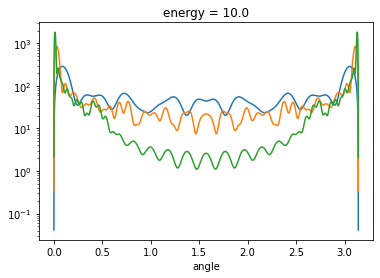

In [6]:
data_all.sel(energy=0.1).plot()
data_all.sel(energy=1.0).plot()
data_all.sel(energy=10).plot()
plt.yscale('log')

In [7]:
data_all

<xarray.DataArray (energy: 31, angle: 768)>
array([[0.041353, 0.21789 , 0.53548 , ..., 0.53548 , 0.21789 , 0.041353],
       [0.3526  , 1.8578  , 4.5658  , ..., 4.5658  , 1.8578  , 0.3526  ],
       [0.40951 , 2.1577  , 5.3027  , ..., 5.3027  , 2.1577  , 0.40951 ],
       ...,
       [0.20267 , 1.0679  , 2.6244  , ..., 2.6244  , 1.0679  , 0.20267 ],
       [0.26178 , 1.3793  , 3.3898  , ..., 3.3898  , 1.3793  , 0.26178 ],
       [0.28353 , 1.4939  , 3.6714  , ..., 3.6714  , 1.4939  , 0.28353 ]])
Coordinates:
  * angle    (angle) float64 7.691e-06 4.052e-05 9.959e-05 ... 3.142 3.142 3.142
  * energy   (energy) float64 0.1 1.0 1.25 1.58 1.99 ... 0.398 0.501 0.631 0.794
Attributes:
    value:    $2\pi \sin\theta d\sigma / d\Omega$
    unit:     a.u.

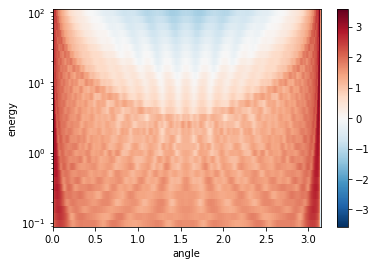

In [8]:
np.log10(data_all).sortby('energy').plot()
plt.yscale('log')

# Crosssections

In [9]:
filename = './elastic.txt'
with open(filename, 'r') as f:
    lines = f.readlines()

In [10]:
data_all = xr.Dataset({})

energy, sigma = [], []
for line in lines[32: 63]:
    items = [float(it) for it in line.split('\t')]
    energy.append(items[2])
    sigma.append(items[3])
data_all['total'] = xr.DataArray(sigma, dims=['energy'], coords={'energy': energy})
data_all['total'].attrs = {'unit': 'au'}

energy, sigma = [], []
for line in lines[70: 101]:
    items = [float(it) for it in line.split('\t')]
    energy.append(items[2])
    sigma.append(items[3])
data_all['momentum'] = xr.DataArray(sigma, dims=['energy'], coords={'energy': energy})
data_all['momentum'].attrs = {'unit': 'au'}

energy, sigma = [], []
for line in lines[108: 139]:
    items = [float(it) for it in line.split('\t')]
    energy.append(items[2])
    sigma.append(items[3])
data_all['spin_exchange'] = xr.DataArray(sigma, dims=['energy'], coords={'energy': energy})
data_all['spin_exchange'].attrs = {'unit': 'au'}

energy, sigma = [], []
for line in lines[146: 177]:
    items = [float(it) for it in line.split('\t')]
    energy.append(items[2])
    sigma.append(items[3])
data_all['viscosity'] = xr.DataArray(sigma, dims=['energy'], coords={'energy': energy})
data_all['viscosity'].attrs = {'unit': 'au'}

In [11]:
data_all.to_netcdf('elastic.nc')

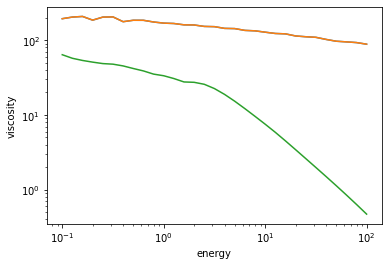

In [12]:
data_all['total'].plot()
data_all['momentum'].plot()
data_all['viscosity'].plot()
plt.yscale('log')
plt.xscale('log')